# House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting.

My goal for this project is to minimize the Root Mean Square Error as much as possible. Ideally, I would like my RSME to be 0.00044 (that is the lowest one, currently) or lower.

## Step 1: Frame the Problem

__Business Objective:__ Using various explanatory features, build a predictive model that will be able to accurately predict the final price of a given home.

The residential homes are located in Ames, Iowa. 

We are given 79 explanatory features.

__Type of Task:__ This is a classic Regression problem.

__Performance Measure:__ We will use the Root Mean Square Error (RSME). This performance measure is most commonly used for Regression tasks. Furthermore, it is the performance measure that we are looking to minimize. We will also be taking a look at accuracy.

## Step 2: Retrieving the Data

You may retrieve the data from the [competition website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description).

__Data Breakdown:__
- data_description.txt: description/information about the data
- sample_submission.csv: what a submission should look like
- test.csv: testing set
- train.csv: training set

In [1]:
# Importing the Basic ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [3]:
# Retrieving the Data
PATH_NAME= '/Users/jinalshah/Jinal/Github Repos/House-Prices-Challenge-Solution/Data'
raw_train = pd.read_csv(PATH_NAME+'/train.csv')
raw_test = pd.read_csv(PATH_NAME+'/test.csv')
sample_submission = pd.read_csv(PATH_NAME+'/sample_submission.csv')

In [4]:
# Previewing the training data
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are clearly a lot of features! There are 79 total features (not including Id and SalePrice). I don't think all features are necessary, and it will be up to us to determine which features are necessary and which are not.

In [5]:
# Previewing the testing data
raw_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Previewing the Submission Set
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


We need to make sure we include the Id and the Predicted Sale Price in our submission.

## Step 3: Exploratory Data Analysis (EDA)

### Feature Descriptions
Since there are 79 features, I won't explain each one in depth. However, the competition site and the data_description.txt file explain each feature in depth.

We won't go through each feature because there are so many the data_description.txt file already provides indepth analysis of each feature.

In [12]:
# Seeing the Number of Examples
print('# of Examples: ', raw_train.shape[0])

# of Examples:  1460


In [22]:
# Seeing which features have missing values
dict(raw_train.isnull().sum())

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

In [25]:
# Printing out the features that have missing values
missing_vals = {}
for i in dict(raw_train.isnull().sum()).keys():
    if dict(raw_train.isnull().sum())[i] != 0:
        missing_vals[i] = round(dict(raw_train.isnull().sum())[i]/raw_train.shape[0] *100,2)

print('-----Percentage of Missing Values from the Features with Missing Values-----')
missing_vals

-----Percentage of Missing Values from the Features with Missing Values-----


{'LotFrontage': 17.74,
 'Alley': 93.77,
 'MasVnrType': 0.55,
 'MasVnrArea': 0.55,
 'BsmtQual': 2.53,
 'BsmtCond': 2.53,
 'BsmtExposure': 2.6,
 'BsmtFinType1': 2.53,
 'BsmtFinType2': 2.6,
 'Electrical': 0.07,
 'FireplaceQu': 47.26,
 'GarageType': 5.55,
 'GarageYrBlt': 5.55,
 'GarageFinish': 5.55,
 'GarageQual': 5.55,
 'GarageCond': 5.55,
 'PoolQC': 99.52,
 'Fence': 80.75,
 'MiscFeature': 96.3}

A lot of features have missing values. We will deal with those missing values later on. We are going to need to understand why they are missing. The Alley, PoolQC, Fence, FireplaceQu and MiscFeature have a really high percentage of missing values. Something to consider is removing them since most of their values are missing.

In [18]:
# Seeing the Type of Each Feature
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
print('-----Data Type Breakdown-----')
print('int64: ',35)
print('float64: ',3)
print('object: ',43)
print('-----------------------------')

-----Data Type Breakdown-----
int64:  35
float64:  3
object:  43
-----------------------------


Most of our data are ints or floats. We would need to dive deeper into this because some ints may actually be categories.

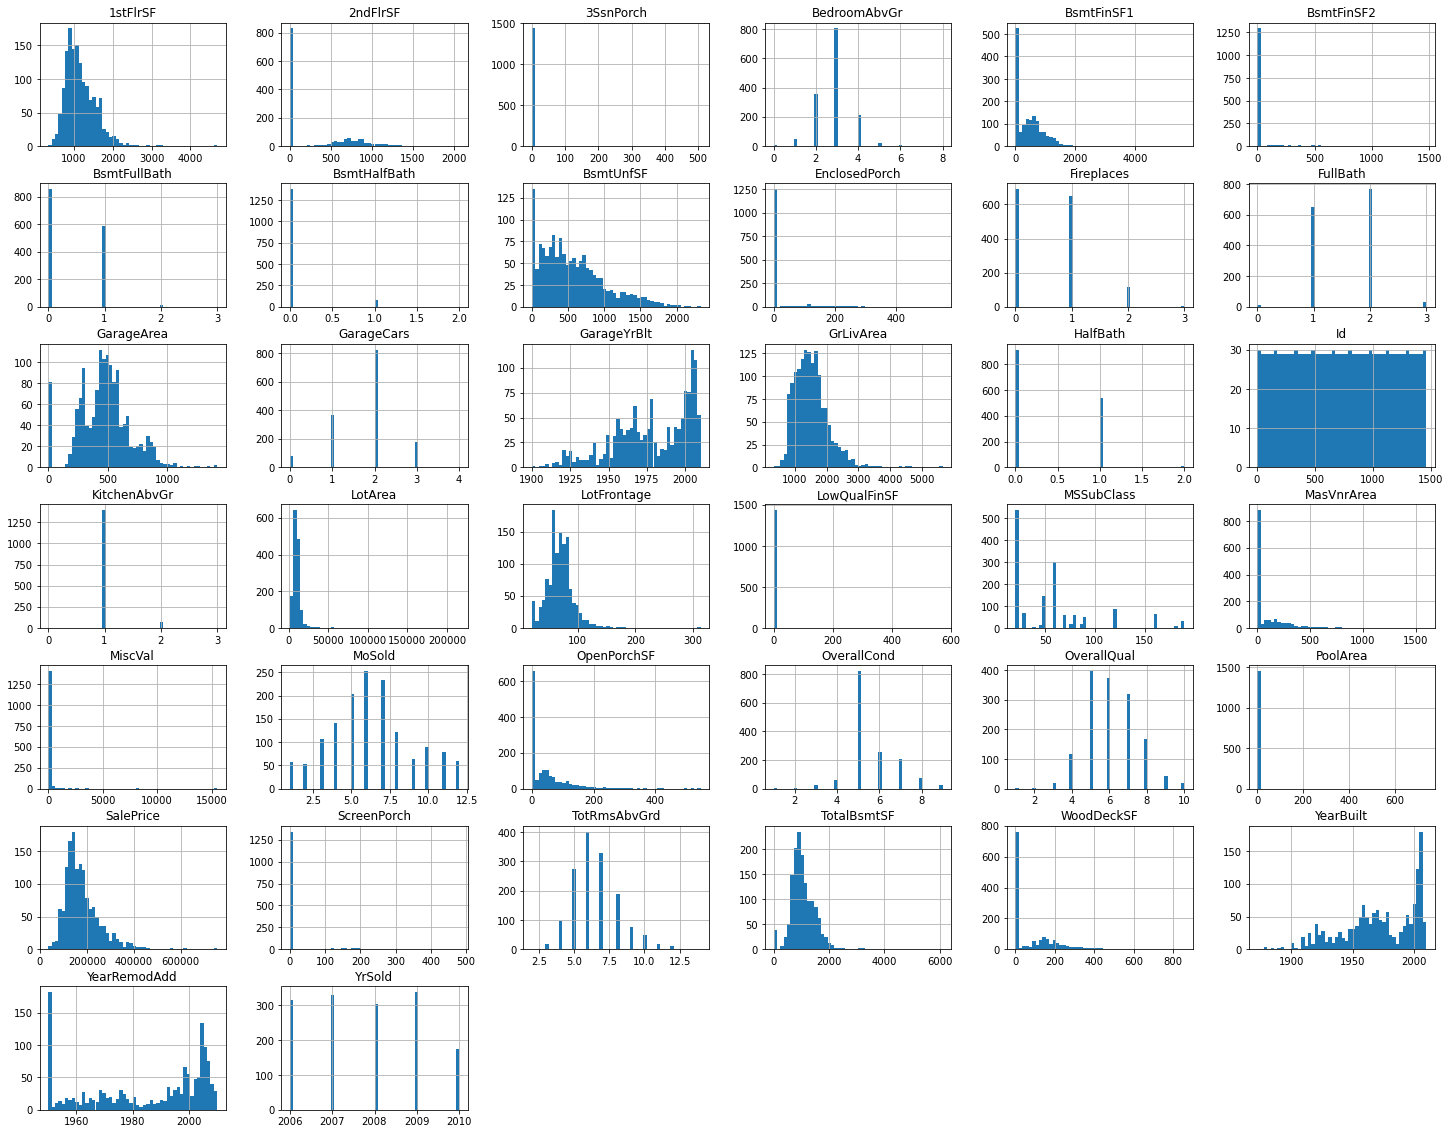

In [34]:
# Plotting the histogram of the data to see which ints are discrete and which are continuous
raw_train.hist(bins=50,figsize=(25,20))
plt.show()